# k-Means Clustering

## Scenario:
Group customers into 3 clusters based on their spending on Electronics and Groceries.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create Synthetic Data
data = pd.DataFrame({
    "Spending on Electronics": [200, 250, 300, 400, 450, 500, 600, 650, 700, 800],
    "Spending on Groceries": [800, 700, 900, 200, 250, 300, 100, 50, 120, 100]
})

data

,Spending on Electronics,Spending on Groceries
0,200,800
1,250,700
2,300,900
3,400,200
4,450,250
5,500,300
6,600,100
7,650,50
8,700,120
9,800,100


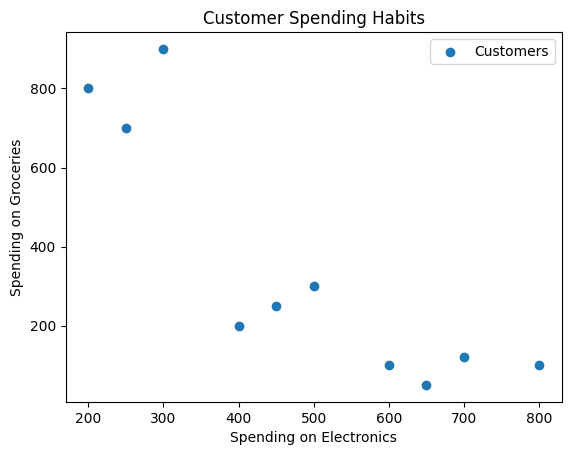

In [69]:
# Visualize the data
plt.scatter(data['Spending on Electronics'], data['Spending on Groceries'], label='Customers')
plt.xlabel('Spending on Electronics')
plt.ylabel('Spending on Groceries')
plt.title('Customer Spending Habits')
plt.legend()
plt.show()

In [70]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters = 3, random_state = 12) # 3 clusters and random state for reproducibility (seed)
data['Cluster'] = kmeans.fit_predict(data) # This code will assign each data point to a cluster
data

,Spending on Electronics,Spending on Groceries,Cluster
0,200,800,0
1,250,700,0
2,300,900,0
3,400,200,1
4,450,250,1
5,500,300,1
6,600,100,2
7,650,50,2
8,700,120,2
9,800,100,2


In [71]:
# Gather centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ['Spending on Electronics', 'Spending on Groceries'])
centroids

,Spending on Electronics,Spending on Groceries
0,250.0,800.0
1,450.0,250.0
2,687.5,92.5


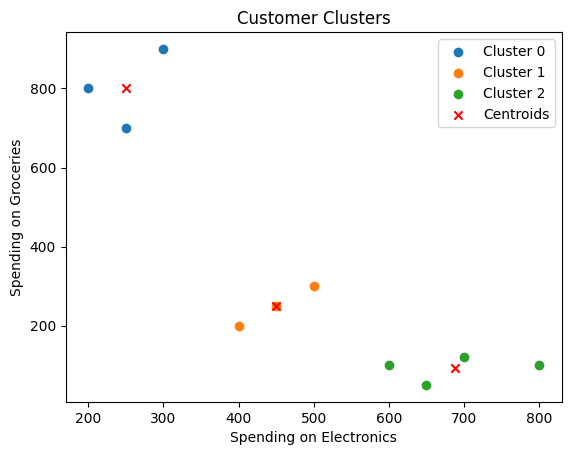

In [72]:
# Visualize the data with clusters
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Spending on Electronics'], cluster_data['Spending on Groceries'], label=f'Cluster {cluster}')

plt.scatter(centroids['Spending on Electronics'], centroids['Spending on Groceries'], color='red', marker='x', label='Centroids')
plt.xlabel('Spending on Electronics')
plt.ylabel('Spending on Groceries')
plt.title('Customer Clusters')
plt.legend()
plt.show()